In [1]:
pip install pandas matplotlib seaborn numpy

Note: you may need to restart the kernel to use updated packages.


# First Five Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv(r'C:\Users\azhin\Downloads\Ststic.csv', encoding='latin-1')
   

df.head()


,Movie Name,Type,Views,Review,Year,Time,Prize Won,Language
0,Kimi,Drama,8658,6.3,2022,38,None,English
1,Baby Driver,"Drama,Crime,Action",38830,7.6,2017,56,42 wins & 67 nominations,English
2,The Forgotten Battle,"Drama,War",56141,7.1,2020,304,6 wins & 4 nominations,English
3,The Nun,"Horror,Mystery,Thriller",304284,5.7,2018,951,None,English
4,Joker,"Crime,Drama,Thriller",951477,8.8,2019,855,3 wins & 2 nomination,English


# High Reviews 

In [3]:
high_review = df[df['Review'] > 9]

print(high_review)


                   Movie Name                      Type   Views  Review  Year  \
6               The GodFather               Drama,Crime  447483     9.2  1972   
94   The Shawshank Redemption                     Drama  265672     9.3  1994   
140    Spider-man:No way Home  Action,Adventure,Fantasy  212979     9.1  2021   
332               Dil bechara      Comedy,Drama,Romance  152049     9.7  2020   

     Time                 Prize Won Language  
6      26   31 wins & 30 nominatons  English  
94     43   14 wins & 7 nominations  English  
140     1  12 wins & 45 nominations  English  
332    34                      none   Indian  


# Most Rated

In [4]:
# maximum Rating value
max_review = df['Review'].max()

highest_review_rows = df[df['Review'] == max_review]

print(highest_review_rows)


      Movie Name                  Type   Views  Review  Year  Time Prize Won  \
332  Dil bechara  Comedy,Drama,Romance  152049     9.7  2020    34      none   

    Language  
332   Indian  


# Most Viewed

In [5]:
# maximum view value
max_view = df['Views'].max()

highest_view_rows = df[df['Views'] == max_view]

print(highest_view_rows)

    Movie Name           Type    Views  Review  Year  Time  \
382       Love  Romance,Drama  1661497     6.1  2015    29   

                Prize Won        Language  
382  2 wins& 1 nomination  English-French  


# Movies in one year 

In [6]:
movies = df[df['Year'] == 2017]

print(movies)

                                          Movie Name  \
1                                        Baby Driver   
20                                          The End?   
25                                     The Boss Baby   
52                                       Tokyo Ghoul   
53                                    Recep Ivedik 5   
56                             Maigret in Montmartre   
71                                             Night   
109                                      The Captain   
162                              Fifty Shades Darker   
169                          The Fate of the Furious   
186                        Jumanji:Welcome to Jungle   
194                              john wick:chapter 2   
196  Pirates of the caribbean:dead men tell no tales   
210                                    thor:ragnarok   
222                                             coco   
267                                          Mr.Long   
270                                        Jailb

# Most Rated Movie Each Year

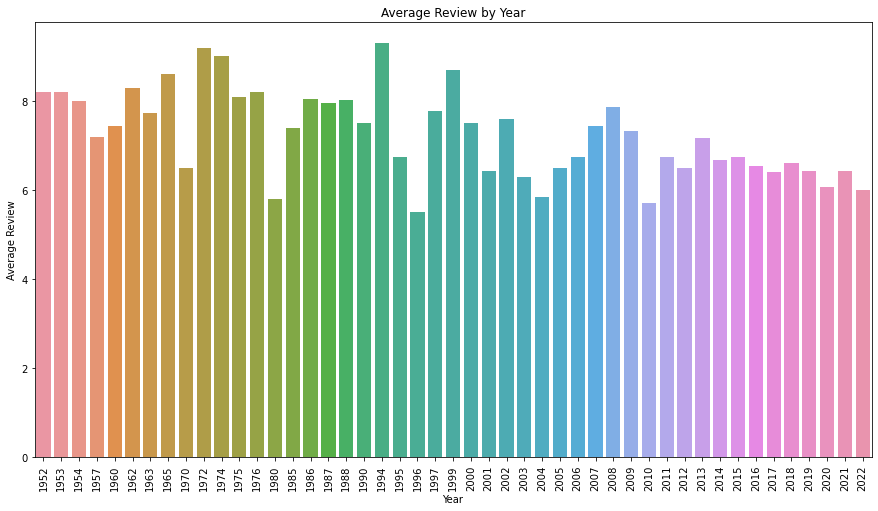

In [7]:


plt.figure(figsize=(15, 8))
sns.barplot(x='Year', y='Review', data=df.groupby('Year')['Review'].mean().reset_index())
plt.title('Average Review by Year')
plt.xlabel('Year')
plt.ylabel('Average Review')
plt.xticks(rotation=90)
plt.show()

# Produced Movies in a Year

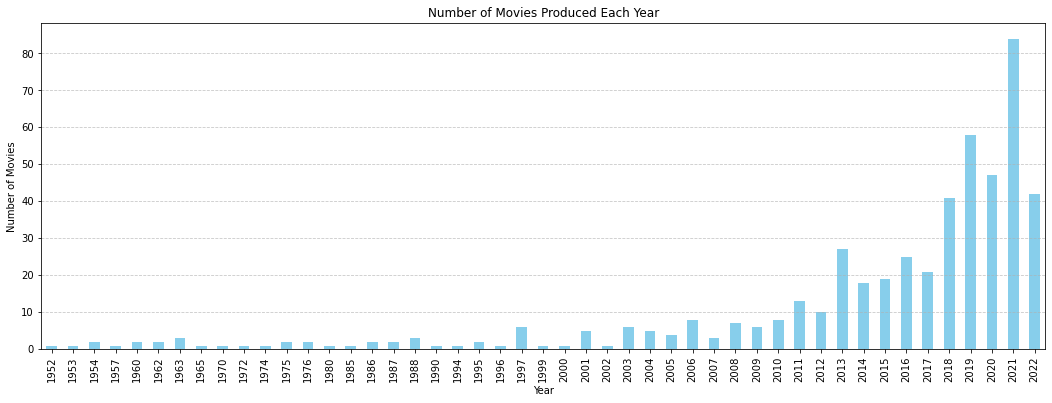

In [8]:
movies_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(18, 6))
movies_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Produced Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Most Watched Movie Language

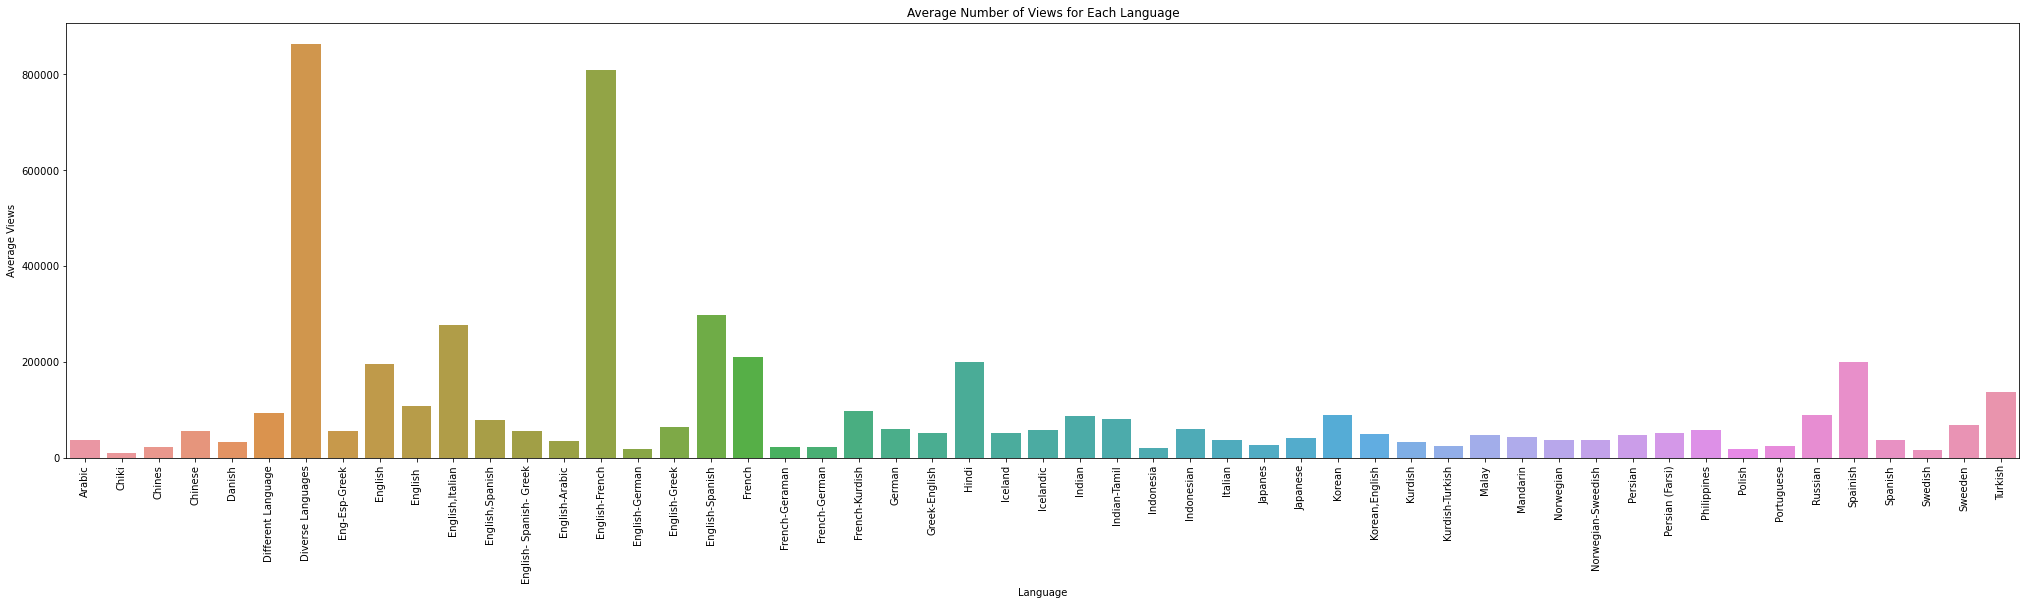

In [9]:
average_views_per_language = df.groupby('Language')['Views'].mean().reset_index()

plt.figure(figsize=(35, 8))
sns.barplot(x='Language', y='Views', data=average_views_per_language)
plt.title('Average Number of Views for Each Language')
plt.xlabel('Language')
plt.ylabel('Average Views')
plt.xticks(rotation=90)
plt.show()

# Most Rated Types of Movie

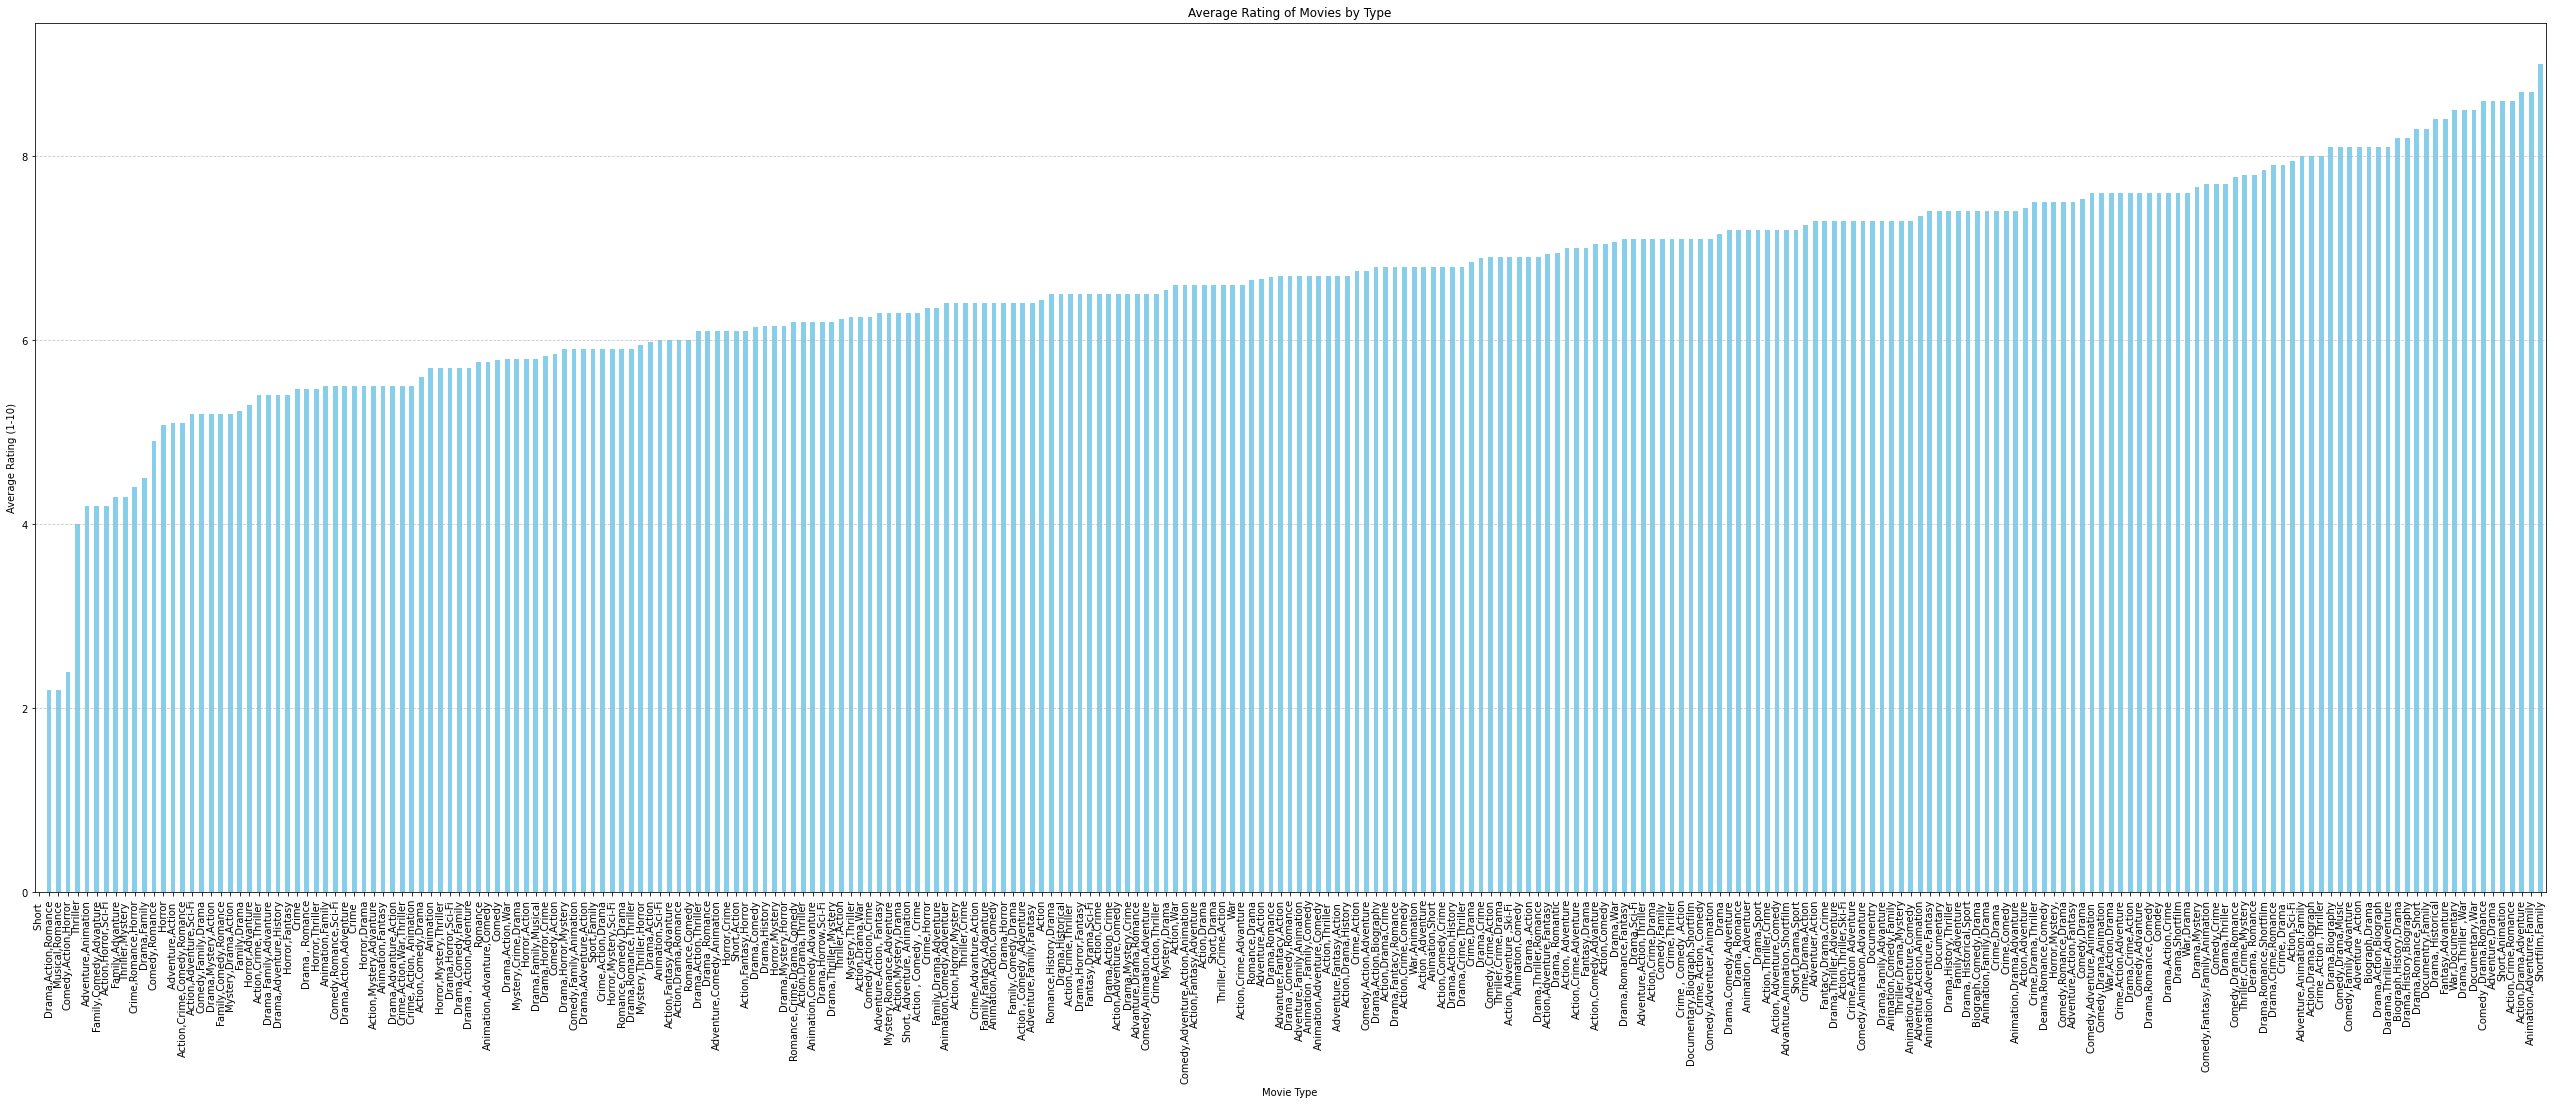

In [10]:
average_rating = df.groupby('Type')['Review'].mean().sort_values()

# Plot the bar plot
plt.figure(figsize=(45, 16))
average_rating.plot(kind='bar', color='skyblue')
plt.xlabel('Movie Type')
plt.ylabel('Average Rating (1-10)')
plt.title('Average Rating of Movies by Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90) 
plt.show()

# Most Viewd Types of Movie

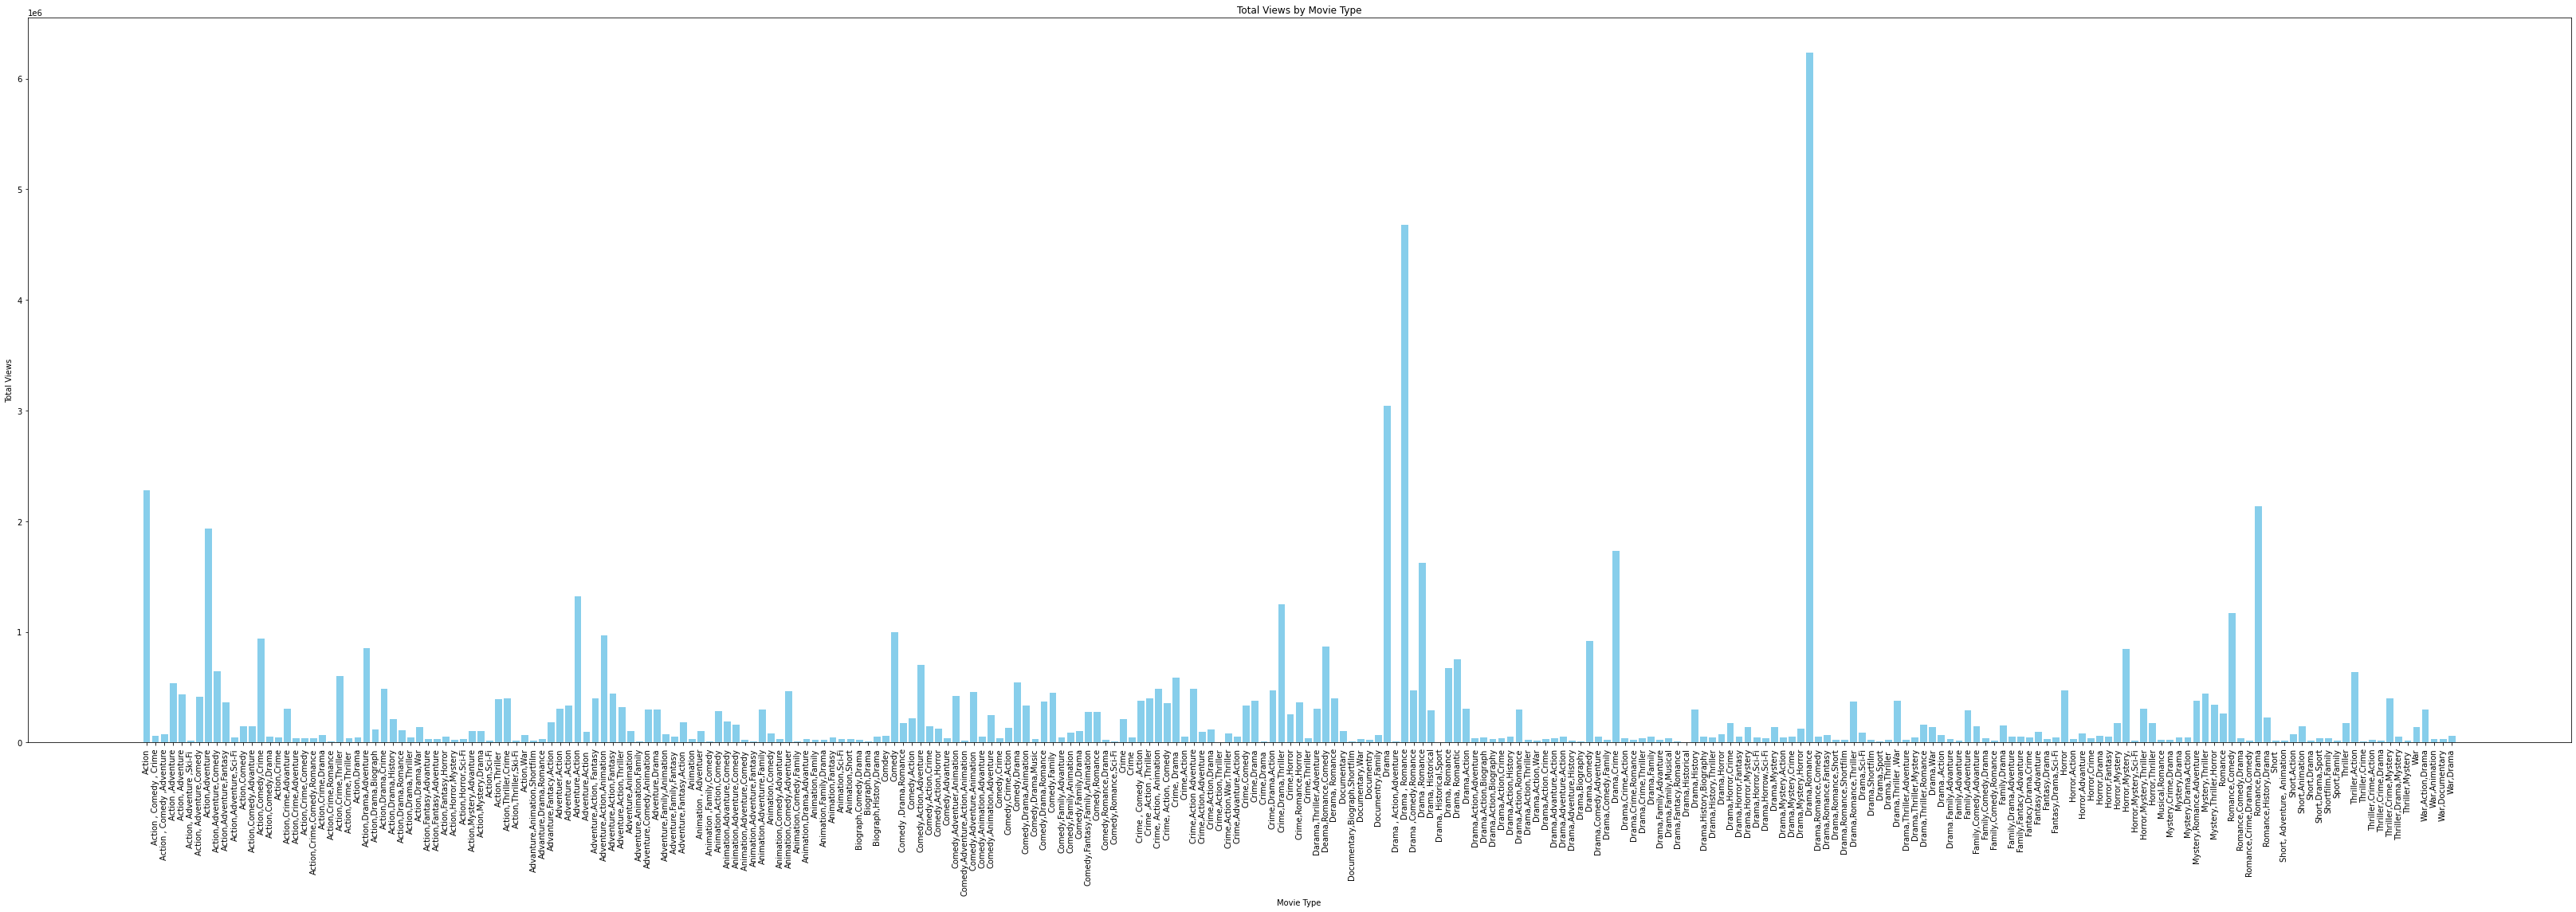

In [11]:
total_views_by_type = df.groupby('Type')['Views'].sum().reset_index()

plt.figure(figsize=(45, 16))
plt.bar(total_views_by_type['Type'], total_views_by_type['Views'], color='skyblue')
plt.title('Total Views by Movie Type')
plt.xlabel('Movie Type')
plt.ylabel('Total Views')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Most Used Types of Movie

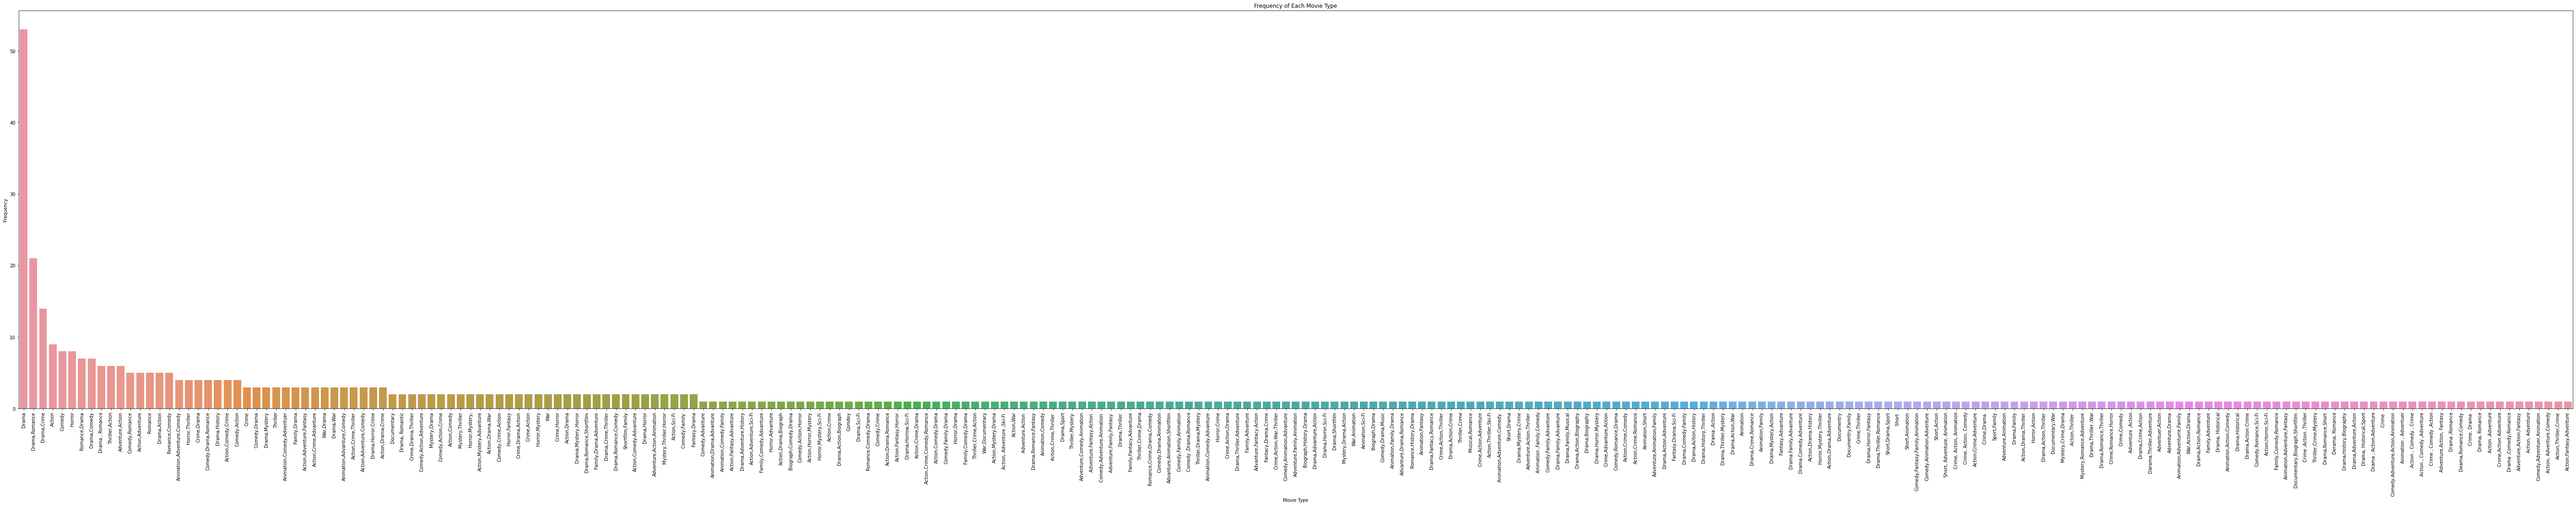

In [12]:
movie_type_counts = df['Type'].value_counts().reset_index()

plt.figure(figsize=(100, 16))
sns.barplot(x='index', y='Type', data=movie_type_counts)
plt.title('Frequency of Each Movie Type')
plt.xlabel('Movie Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# Prefered Time For a Good Movie

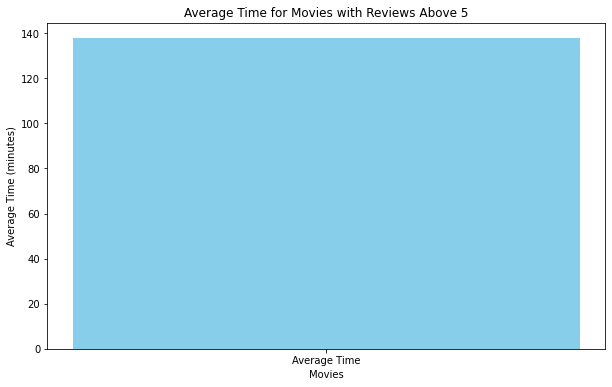

In [13]:
high_review = df[df['Review'] > 5]

# average time for movies with higher reviews
average_time = high_review['Time'].mean()

# Plot the average time
plt.figure(figsize=(10, 6))
plt.bar(['Average Time'], [average_time], color='skyblue')
plt.title('Average Time for Movies with Reviews Above 5')
plt.xlabel('Movies')
plt.ylabel('Average Time (minutes)')
plt.ylim(0, None)  
plt.show()

# Correlation

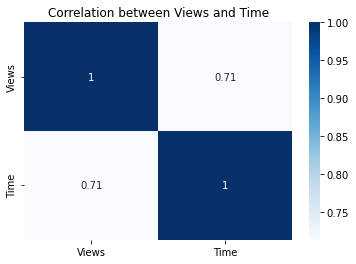

In [14]:
corr = df[['Views', 'Time']].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation between Views and Time')
plt.show()

In [15]:
# Calculate the correlation coefficient between Views and Time
correlation = df['Views'].corr(df['Time'])

print("Correlation coefficient between Views and Time:", correlation)

Correlation coefficient between Views and Time: 0.7135286406328517
